In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
# Read the data
df = pd.read_csv('data_sets/position_salaries.csv.txt')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
# Prepare the data
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df = df.drop(columns='Position')
df.head()

,00,Level,Salary
0,1,1,45000
1,1,2,50000
2,1,3,60000
3,1,4,80000
4,1,5,110000


In [6]:
# Build the pices for gradient descent
Y = df['Salary']
X = df.drop(columns='Salary')
X.head()

,00,Level
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


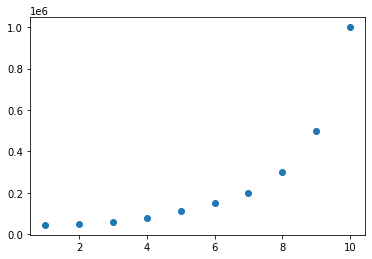

In [7]:
# As we can see a linear prediction won't fix very well so we have to try with a polynomial.
plt.figure()
plt.scatter(x=X['Level'],y=Y)           
plt.show()

In [8]:
# Add a two new features with exponential ^2 and ^3 to the data set.
X['Level2'] = X['Level']**2
X['Level3'] = X['Level']**3
X['Level4'] = X['Level']**4
X.head()

,00,Level,Level2,Level3,Level4
0,1,1,1,1,1
1,1,2,4,8,16
2,1,3,9,27,81
3,1,4,16,64,256
4,1,5,25,125,625


In [9]:
# Normalize the data
m = len(X)
X = X / X.max()
alpha = 0.05 # Learning rate (gradient descent step)
m,n = X.shape
theta = np.ones(n) # Inital colomn vector of theta 
num_of_iterations = 700
X

,00,Level,Level2,Level3,Level4
0,1.0,0.1,0.01,0.001,0.0001
1,1.0,0.2,0.04,0.008,0.0016
2,1.0,0.3,0.09,0.027,0.0081
3,1.0,0.4,0.16,0.064,0.0256
4,1.0,0.5,0.25,0.125,0.0625
5,1.0,0.6,0.36,0.216,0.1296
6,1.0,0.7,0.49,0.343,0.2401
7,1.0,0.8,0.64,0.512,0.4096
8,1.0,0.9,0.81,0.729,0.6561
9,1.0,1.0,1.00,1.000,1.0000


In [10]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [11]:
# Gradient descent algoritm.
# 1) Calculate the hypothesis value for each row(B0x0 + B1x1 + B2X2 +,...+BnXn)
# 2) Calculate the loss (diference between hypothesis and y value of data set)
# 3) Gradient calculation
# 4) Add a new record of the cost
def batch_gradient_descent(x, y, theta, alpha, m, iterations_num):
    
    cost_history = [0] * iterations_num
    
    for i in range(0, iterations_num):
        # Hypothesis value
        hypotesis = np.dot(x, theta)
        #print("hypotesis: {}".format(hypotesis))
        
        # Loss
        loss = hypotesis - y
        #print("loss: {}".format(loss))
        
        # Gradient Calculation
        gradient = np.dot(np.transpose(x), loss) / m
        #print("gradient: {}".format(gradient))
        
        # Vectorization way to update theta values
        theta = theta - alpha * gradient
        #theta[0] = theta[0] - alpha * gradient[0] # Update theta0
        #theta[1] = theta[1] - alpha * gradient[1] # Update theta1
        
        # New Cost Value
        cost = cost_function(x, y, theta)
        cost_history[i] = cost
        
    return theta, cost_history

In [12]:
theta.shape
X.shape

(10, 5)

In [13]:
thetas_result, cost_history = batch_gradient_descent(X, Y, theta, alpha, m, num_of_iterations)
print(thetas_result)


[ -1610.20339038   9442.33676096 156430.55654818 285808.84182573
 386100.79260279]


In [14]:
# For plot purposes let's calculate all the "calculated" Y for given X
y_calculated = X.dot(thetas_result)
X_for_plot = X
Y_for_plot = y_calculated

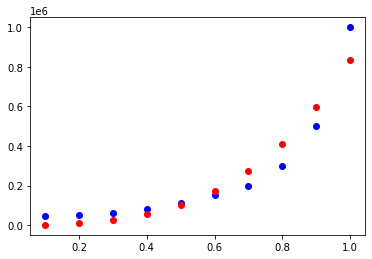

In [15]:
plt.figure()
plt.scatter(x=X['Level'],y=Y, c='b')           
plt.scatter(x=X['Level'], y=y_calculated, c='r')
plt.show()

Text(0, 0.5, 'cost')

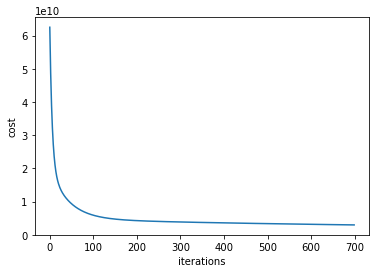

In [16]:
# Visualice the cost fuction for each iteration in the batch gradient descend algorithm
iterations = list(range(0,num_of_iterations))
plt.plot(iterations, cost_history, label='linear')  # Plot some data on the (implicit) axes.
plt.xlabel('iterations')
plt.ylabel('cost')

In [17]:
# Evaluate the accuracy level
r2 = r2_score(Y,y_calculated)
print(r2)

0.9265548779476576
